In [1]:
import numpy as np
import math as m
import csv
import pandas as pd
import matplotlib.pyplot as plt
from numpy.lib.function_base import append
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
#khai bao
l1 = 50 #length for link 1
l2 = 40 #length for link 2
l3 = 20 #length for link 3
x_train = []
y_train = []
data=[]
a = []
for t1 in range(0, 180, 2): 
  for t2 in range(0, 180, 2):
    #forward kinematics
    t3 = 90-t2-t1
    px = l1*m.cos(m.radians(t1)) + l2*m.cos(m.radians(t1+t2)) + l3*m.cos(m.radians(t1+t2+t3))
    py = l1*m.sin(m.radians(t1)) + l2*m.sin(m.radians(t1+t2)) + l3*m.sin(m.radians(t1+t2+t3))
    t1 = t1/180.0
    t2 = t2/180.0
    t3 = (t3+180.0)/360.0
    px = (px+110)/220
    py = (py+110)/220
    a.append(np.array((t1, t2, t3, px, py)))#colletion of variables into an array
  data.extend(a)

In [5]:
header = ['t1', 't2', 't3', 'Px', 'Py']
with open('robot3bac.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)
    # write multiple rows
    writer.writerows(data)

In [6]:
data=pd.read_csv('robot3bac.csv')
x=np.array(data.drop(['t1','t2','t3'],axis=1)) #create variable y containing input data is px, py 
y=np.array(data[['t1','t2','t3',]])  #create variable y containing output data is angle t1, t2
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
x_train.shape

(294840, 2)

In [7]:
#create model
model = Sequential() 
model.add(Dense(16, activation='relu', input_shape = (2,))) #2 input and 64 noron for layer 1
model.add(Dense(32, activation='relu'))#32 noron for layer 2
model.add(Dense(128, activation='relu'))#16 noron for layer 3
model.add(Dense(3)) #3 output
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 5,203
Trainable params: 5,203
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='mae', optimizer =Adam(), metrics=['acc']) 
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2) #80% data for train, 20% data for test

Epoch 1/10
7371/7371 [==============================] - 17s 2ms/step - loss: 0.0085 - acc: 0.9898 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 2/10
7371/7371 [==============================] - 17s 2ms/step - loss: 0.0035 - acc: 0.9948 - val_loss: 0.0036 - val_acc: 0.9889
Epoch 3/10
7371/7371 [==============================] - 18s 2ms/step - loss: 0.0029 - acc: 0.9940 - val_loss: 0.0036 - val_acc: 0.9887
Epoch 4/10
7371/7371 [==============================] - 18s 2ms/step - loss: 0.0025 - acc: 0.9940 - val_loss: 0.0015 - val_acc: 0.9997
Epoch 5/10
7371/7371 [==============================] - 17s 2ms/step - loss: 0.0021 - acc: 0.9944 - val_loss: 0.0018 - val_acc: 0.9889
Epoch 6/10
7371/7371 [==============================] - 20s 3ms/step - loss: 0.0020 - acc: 0.9945 - val_loss: 0.0021 - val_acc: 0.9889
Epoch 7/10
7371/7371 [==============================] - 17s 2ms/step - loss: 0.0018 - acc: 0.9947 - val_loss: 0.0020 - val_acc: 0.9998
Epoch 8/10
7371/7371 [==============================] -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


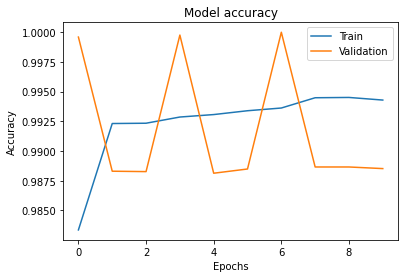

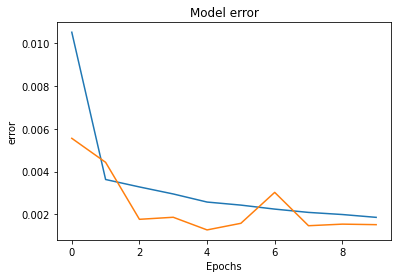

In [ ]:
#plot accurracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

#plot error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('Epochs')
plt.show()

In [ ]:
#save model
model.save_weights('robot_3_dof.h5')

In [9]:
px = (float(input("Px_desires: "))+110.0)/220.0
py = (float(input("Py_desires: "))+110.0)/220.0
test = model.predict([[px,py]])
t1 = test[0][0]*180.0
t2 = test[0][1]*180.0
t3 = test[0][2]*360-180
px_predict = l1*m.cos(m.radians(t1)) + l2*m.cos(m.radians(t1+t2)) + l3*m.cos(m.radians(t1+t2+t3))
py_predict = l1*m.sin(m.radians(t1)) + l2*m.sin(m.radians(t1+t2)) + l3*m.sin(m.radians(t1+t2+t3))
print('Px_pre = ',px_predict,'Py_pre = ',py_predict)
print('t1_pre = ',t1,'t2_pre = ',t2,'t3_pre = ',t3)

Px_desires: 20
Py_desires: 30
Px_pre =  13.426851068078513 Py_pre =  34.3506433223467
t1_pre =  -0.34050132147967815 t2_pre =  158.8433575630188 t3_pre =  -70.35144567489624
